# Interpolation method to fill the gap of the data in Time-series
Various interpolation methods are there to fill the gap of the data in time-series datasets, that helps to creat a more efficient Machine Learning Models.

Among them the best one to starts with the linear interpolation technique

#### Load the libraries and data files

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack
import scipy.stats

In [25]:
file_path = r'D:\DATA C\Desktop\Stations_data\Bansathi\Bansathi_all_months_copy'
os.chdir(file_path)

In [26]:
df = pd.read_csv('Bansathi_all.csv', sep = ',') #arse_dates = 'date')

df['date'] = pd.to_datetime(df.date, format = '%d.%m.%Y %H:%M:%S')
df.set_index('date', inplace = True)
df_1hr = df.resample('60min').mean()
df_1day = df.resample('1440min').mean()
# print(df)
date_mask = (df_1hr.index >= '2020-09-25') & (df_1hr.index < '2020-10-14')
date_mask2 = (df_1day.index > '2020-10-01') & (df_1day.index <= '2020-10-31')

## Extracting data with date masks
SM_sensor1 = df_1hr['S1SM'].loc[date_mask]
SM_sensor2 = df_1hr['S2SM'].loc[date_mask]
SM_sensor3 = df_1hr['S3SM'].loc[date_mask]
SM_sensor4 = df_1hr['S4SM'].loc[date_mask]
SM_sensor5 = df_1hr['S5SM'].loc[date_mask]
SM_day_S1 = df_1day['S1SM'].loc[date_mask2]
# Temperature data
ST_sensor1 = df_1hr['S1Temp'].loc[date_mask]
ST_sensor2 = df_1hr['S2Temp'].loc[date_mask]
ST_sensor3 = df_1hr['S3Temp'].loc[date_mask]
ST_sensor4 = df_1hr['S4Temp'].loc[date_mask]
ST_sensor5 = df_1hr['S5Temp'].loc[date_mask]
ST_day_S1 = df_1day['S1Temp'].loc[date_mask2]
SM_sensor1.shape

(456,)

In [27]:
S1_S2_difference = SM_sensor2.values - SM_sensor1.values
# S1_S2_difference

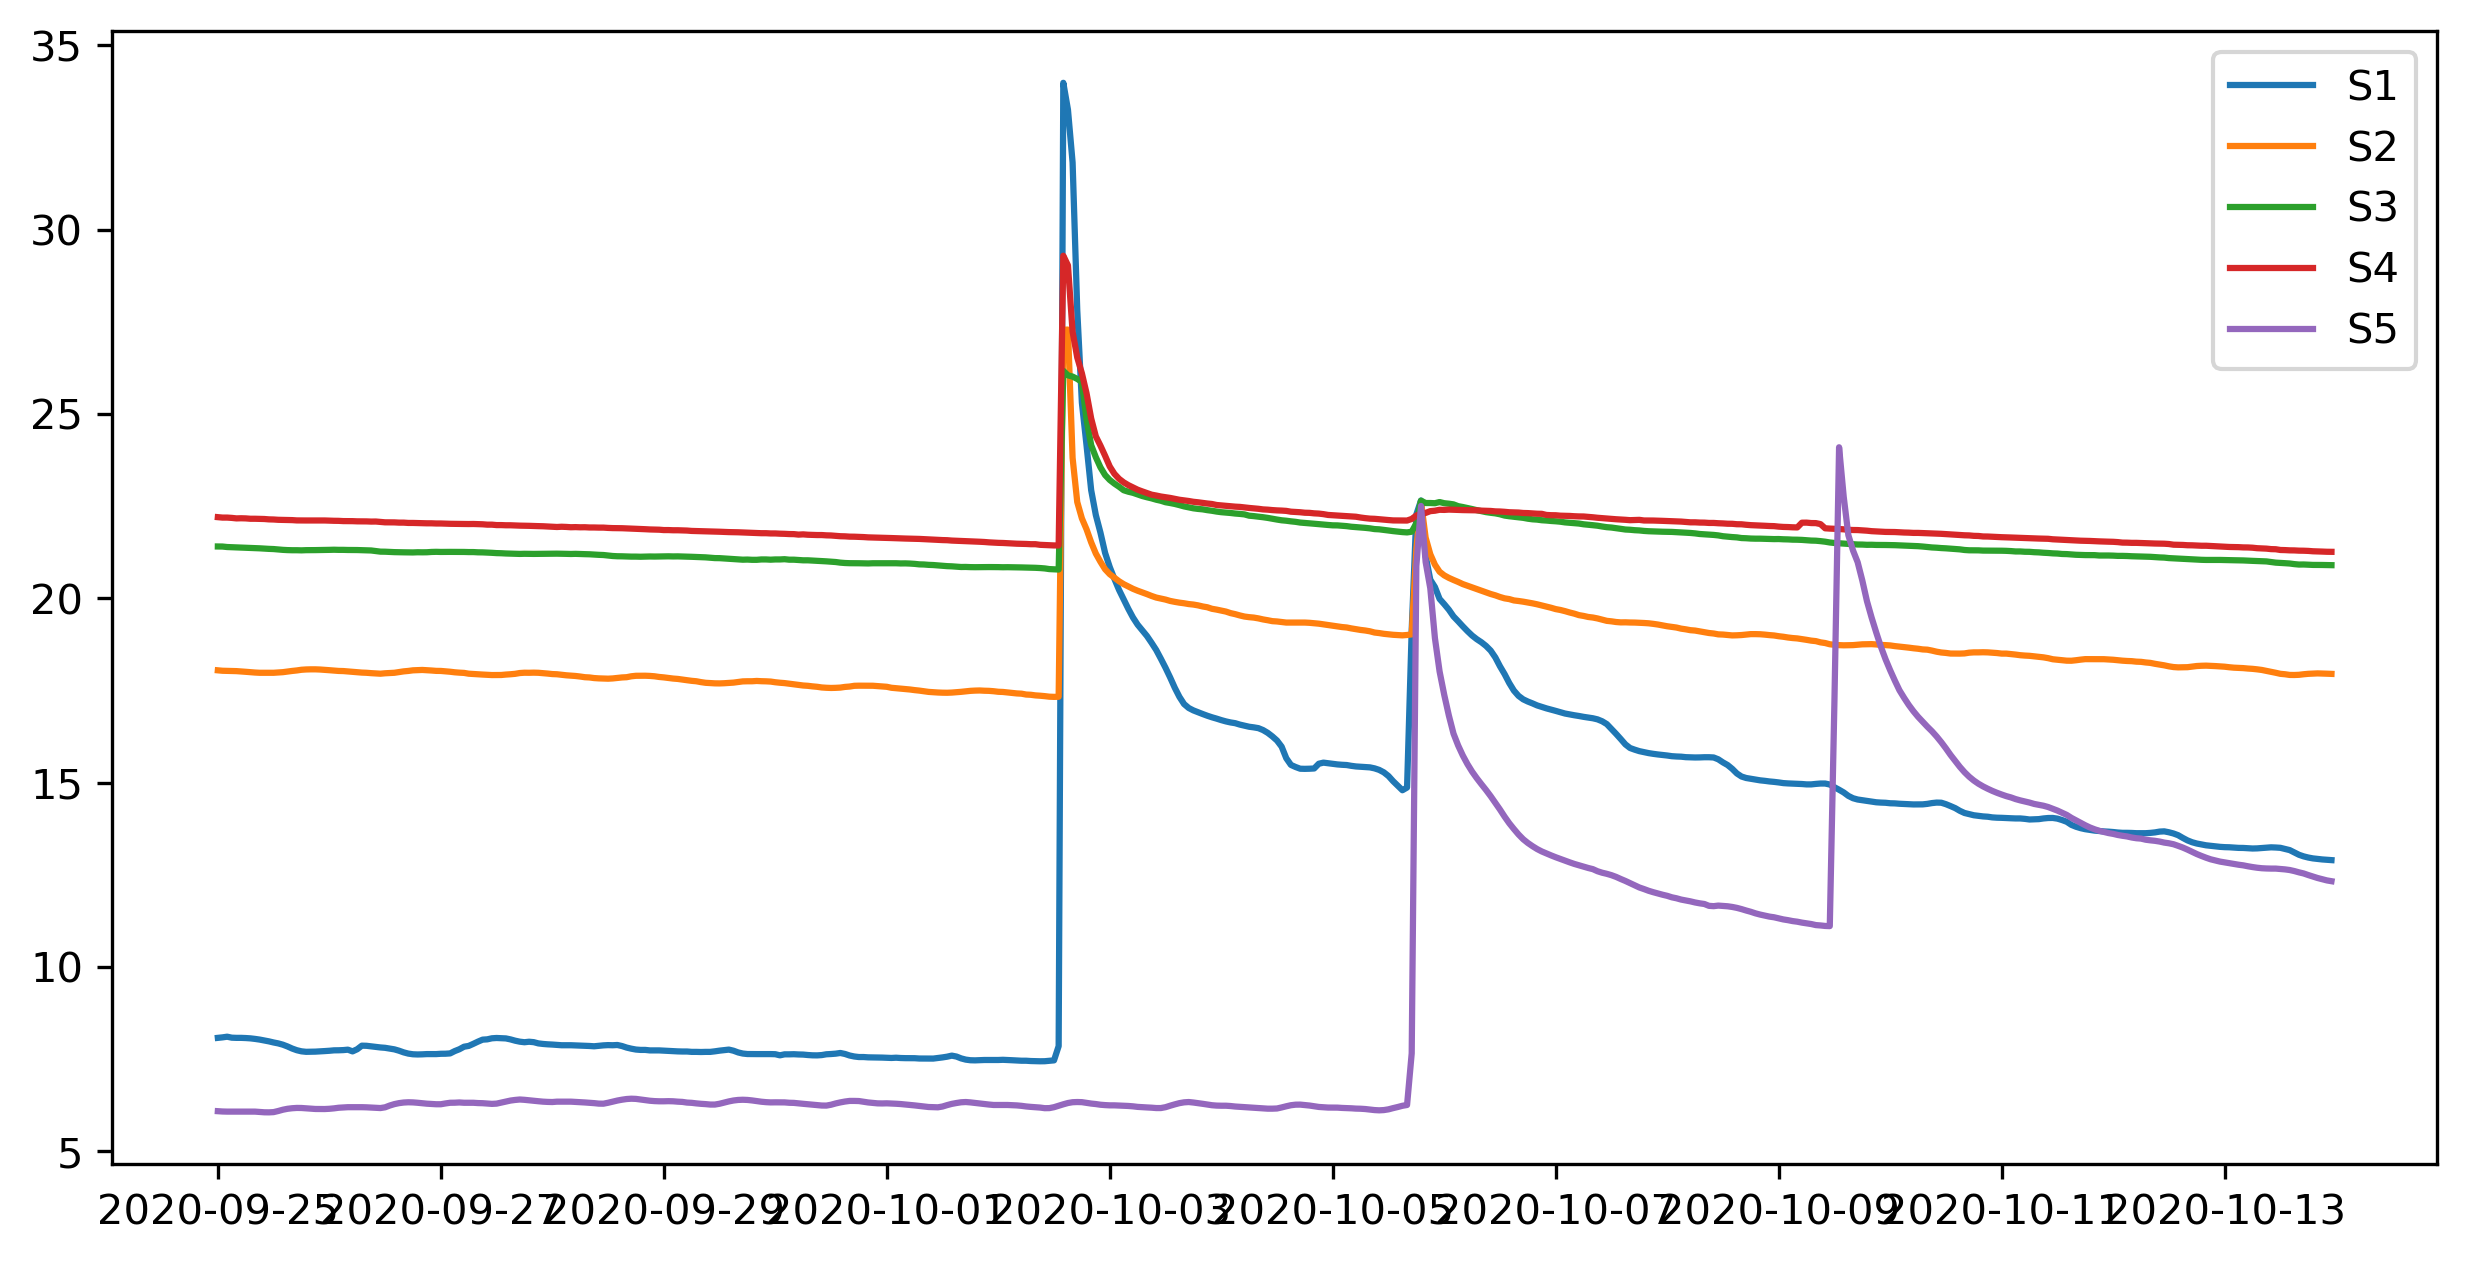

In [28]:
plt.figure(figsize=(10,5), dpi = 300)
plt.plot(SM_sensor1.index, SM_sensor1.values, label = 'S1')
plt.plot(SM_sensor2.index, SM_sensor2.values, label = 'S2')
plt.plot(SM_sensor3.index, SM_sensor3.values, label = 'S3')
plt.plot(SM_sensor4.index, SM_sensor4.values, label = 'S4')
plt.plot(SM_sensor5.index, SM_sensor5.values, label = 'S5')
# plt.plot(SM_sensor1.index, S1_S2_difference, label = 'S1 and S2 difference')
plt.legend()
plt.show()

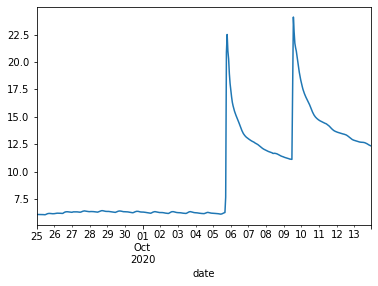

In [29]:
SM_sensor5.plot();

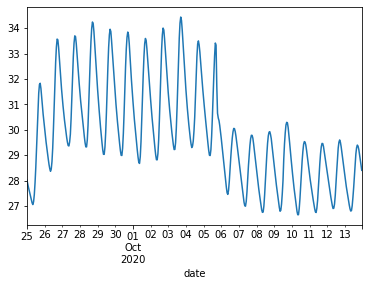

In [30]:
ST_sensor5.plot();

### 1. Linear Interpolation

In [31]:
lin_interpolated_SM1 = SM_sensor1.interpolate(method='linear')
lin_interpolated_SM2 = SM_sensor2.interpolate(method='linear')
lin_interpolated_SM3 = SM_sensor3.interpolate(method='linear')
lin_interpolated_SM4 = SM_sensor4.interpolate(method='linear')
lin_interpolated_SM5 = SM_sensor5.interpolate(method='linear')
# lin_interpolated_SM4 = SM_sensor4.interpolate(method='linear')
# lin_interpolated_SM4 = SM_sensor4.interpolate(method='linear')
lin_interpolated_ST1 = ST_sensor1.interpolate(method='linear')
lin_interpolated_ST2 = ST_sensor2.interpolate(method='linear')
lin_interpolated_ST3 = ST_sensor3.interpolate(method='linear')
lin_interpolated_ST4 = ST_sensor4.interpolate(method='linear')
lin_interpolated_ST5 = ST_sensor5.interpolate(method='linear')

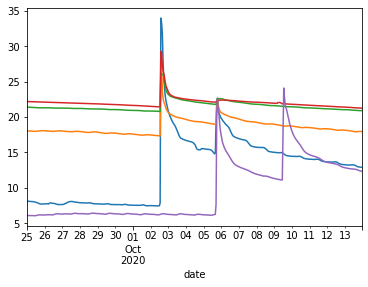

In [32]:
lin_interpolated_SM1.plot()
lin_interpolated_SM2.plot()
lin_interpolated_SM3.plot()
lin_interpolated_SM4.plot()
lin_interpolated_SM5.plot();

# lin_interpolated_ST1.plot()
# lin_interpolated_ST2.plot()
# lin_interpolated_ST3.plot()
# lin_interpolated_ST4.plot();

### Stationary Test of the time series

Dickey-Fuller test for Time series Stationarity uisng Python

In [33]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [34]:
# Null - Hypothesis test for Sensor-1 Soil Moisture
S5_SM = lin_interpolated_SM5.values
result_S5_SM = adfuller(S5_SM)
print('ADF Statistics: %f' % result_S5_SM[0])
print('p-value: %f' % result_S5_SM[1])
print('Critical Values:')
for key, value in result_S5_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_SM[0] < result_S5_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistics: -2.251416
p-value: 0.188116
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary


In [35]:
# Null - Hypothesis test for Sensor-1 Soil Temperature
S5_ST = lin_interpolated_ST5.values
result_S5_ST = adfuller(S5_ST)
print('ADF Statistics: %f' % result_S5_ST[0])
print('p-value: %f' % result_S5_ST[1])
print('Critical Values:')
for key, value in result_S5_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_ST[0] < result_S5_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistics: -0.031477
p-value: 0.955850
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
Failed to Reject Ho - Time Series is Non-Stationary


### FFT Anlaysis 

In [36]:
date = SM_sensor5.index
soilmoisture5 = lin_interpolated_SM5.values

soiltemp5 = lin_interpolated_ST5.values

N = len(soilmoisture5)

In [37]:
soilmoisture_fft5 = sp.fftpack.fft(soilmoisture5)
# soilmoisture_fft1 = sp.fftpack.fftshift(soilmoisture_fft1)
# soilmoisture_fft1 = (soilmoisture_fft1)
soilmoisture_amp5 = np.abs(soilmoisture_fft5)
soilmoisture_psd5 = np.abs(soilmoisture_fft5)**2
fftfreq_SM5 = (sp.fftpack.fftfreq(N, d = N/24))
# fftfreq_SM1 = sp.fftpack.fftshift(sp.fftpack.fftfreq(len(soilmoisture_psd1), d = N))
im = fftfreq_SM5 > 0
len(fftfreq_SM5)

456

In [38]:
soiltemp_fft5 = sp.fftpack.fft(soiltemp5)
# soiltemp_fft1 = sp.fftpack.fftshift(soiltemp_fft1)
# soilmoisture_fft1 = (soilmoisture_fft1)
soiltemp_amp5 = np.abs(soiltemp_fft1)
soiltemp_psd5 = np.abs(soiltemp_fft1)**2
fftfreq_temp5 = (sp.fftpack.fftfreq(N, d = N/24))
# fftfreq_temp1 = sp.fftpack.fftshift(sp.fftpack.fftfreq(len(soiltemp_psd1), d = N))
it = fftfreq_temp5 > 0
print(len(fftfreq_temp5))

456


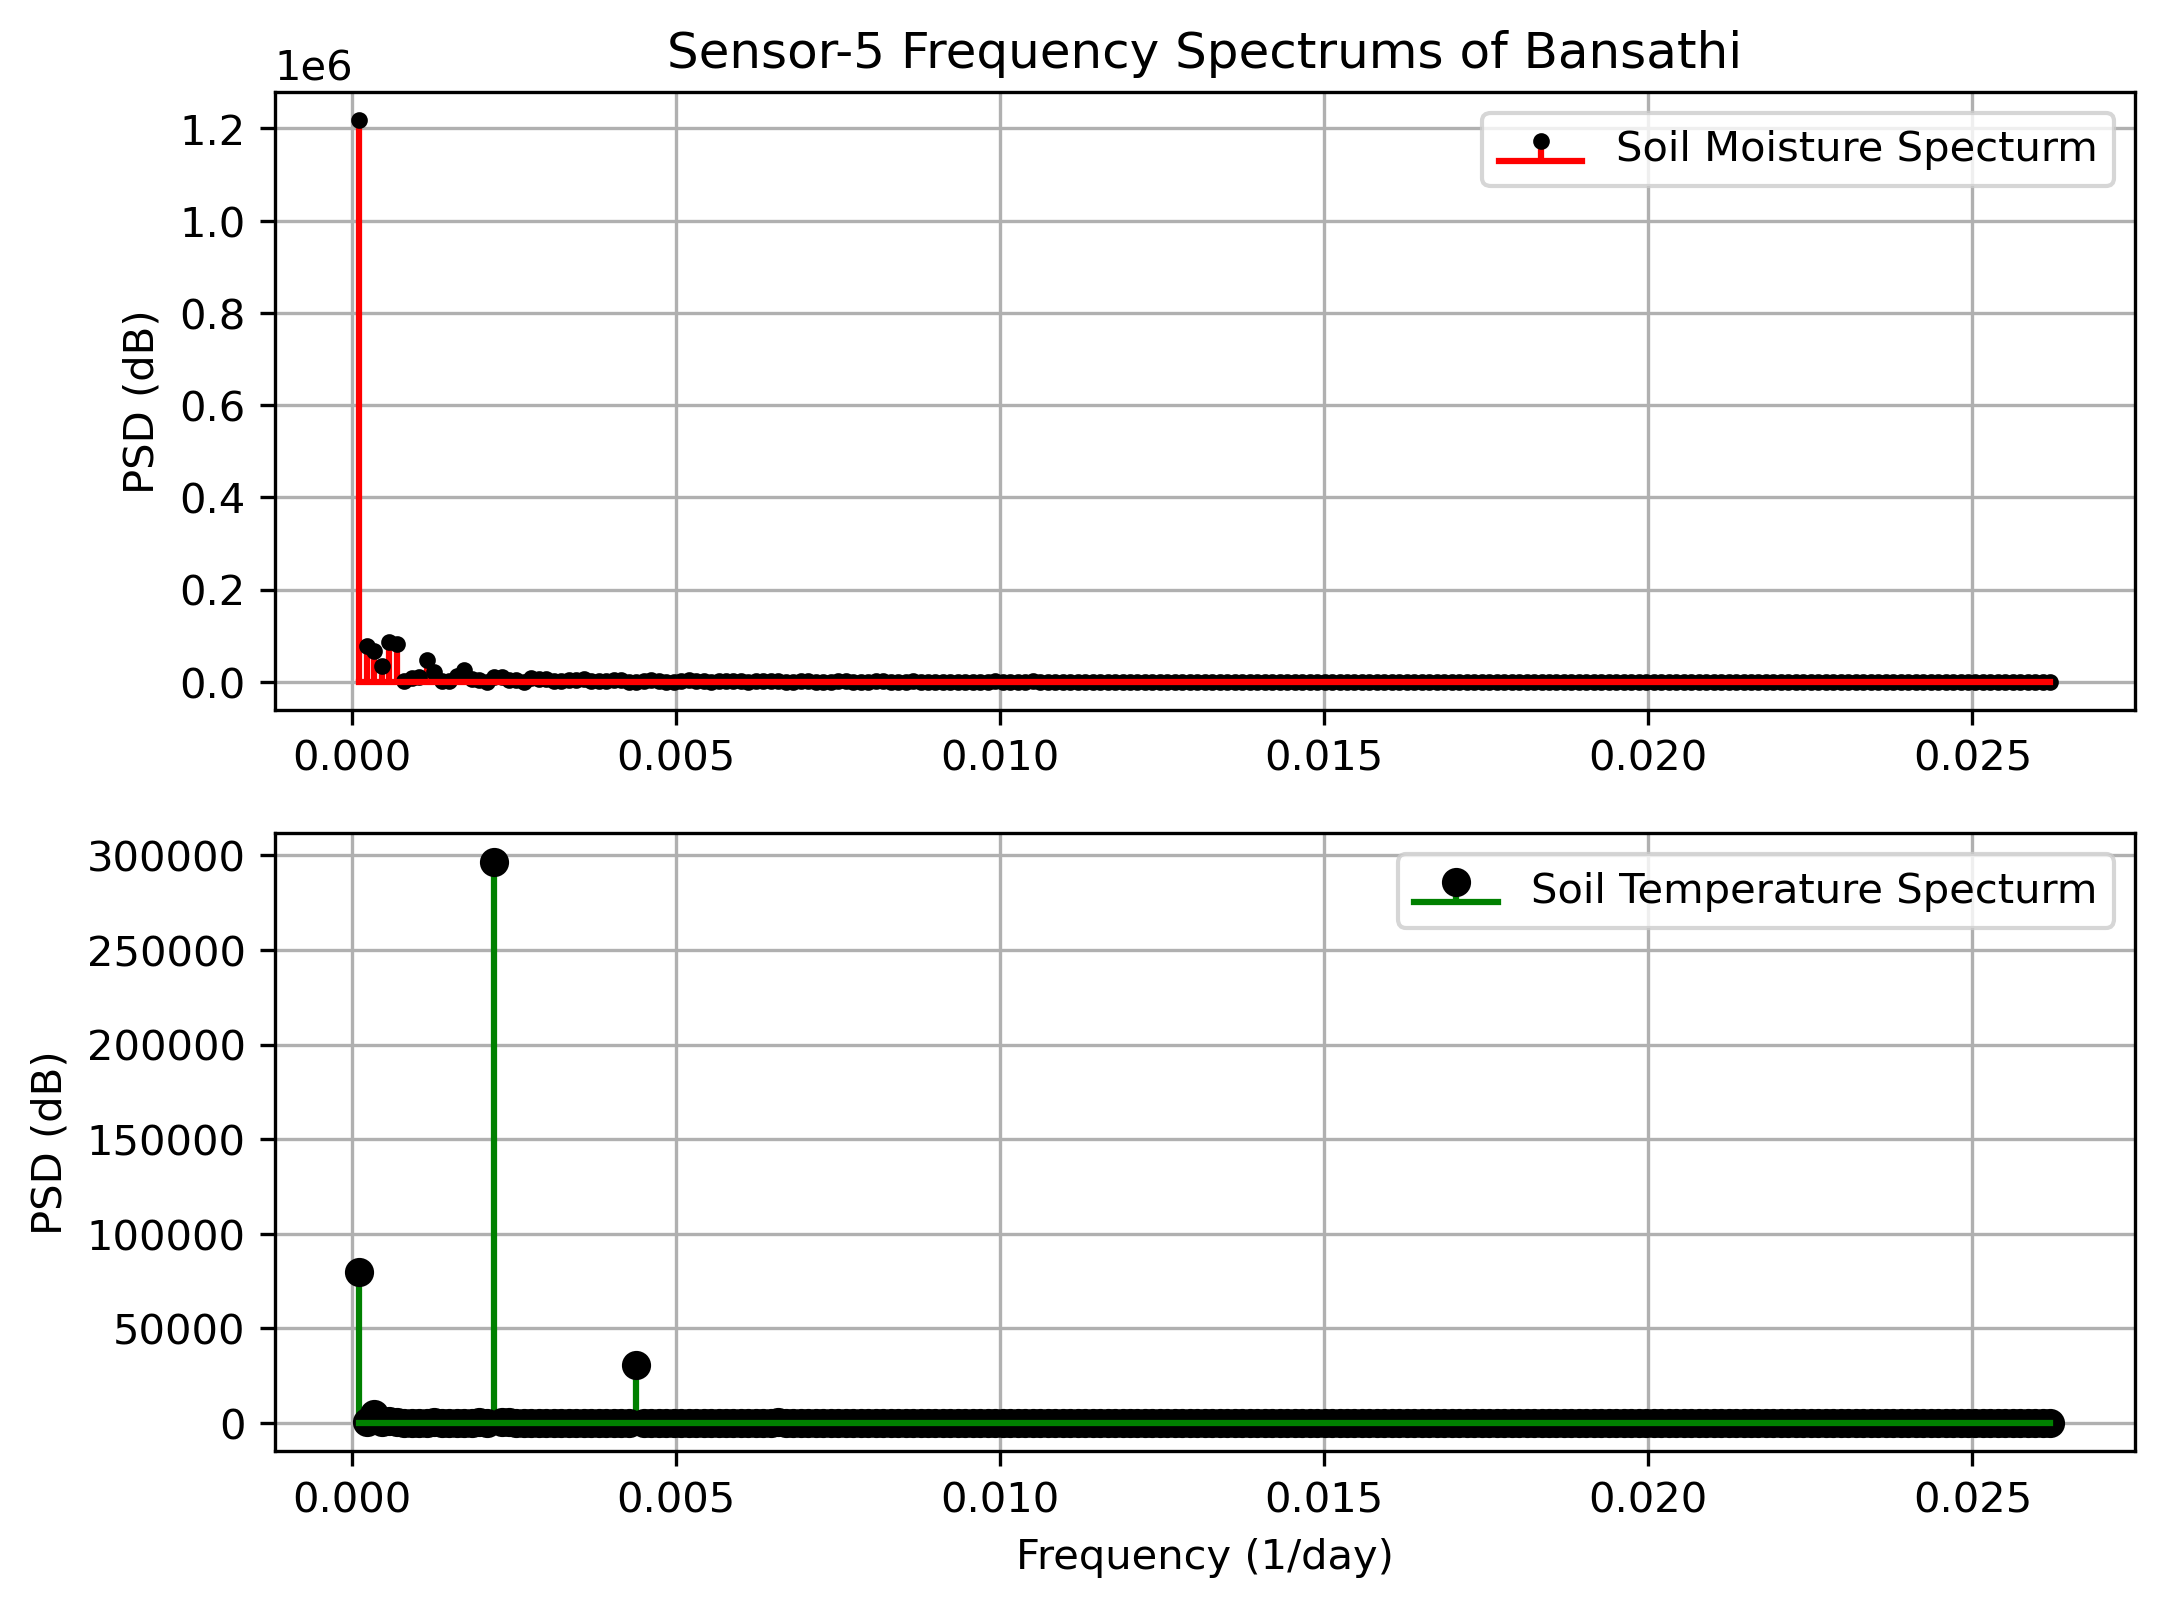

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), dpi = 300)
ax[0].stem(fftfreq_SM5[im], soilmoisture_psd5[im], 'r-', markerfmt = 'k.', basefmt = 'r-',
        label = 'Soil Moisture Specturm')
ax[1].stem(fftfreq_temp5[it], soiltemp_psd5[it], 'g-', markerfmt = 'ko', basefmt = 'g-',
        label = 'Soil Temperature Specturm')
# ax.set_xlim(0, 2)
ax[1].set_xlabel('Frequency (1/day)')
ax[0].set_ylabel('PSD (dB)')
ax[1].set_ylabel('PSD (dB)')
ax[0].legend()
ax[1].legend()
ax[0].set_title('Sensor-5 Frequency Spectrums of Bansathi')
ax[0].grid()
ax[1].grid()
plt.show()

In [40]:
Amp_freq_SM5 = np.array([soilmoisture_psd5[im], fftfreq_SM5[im]])
Amp_freq_ST5 = np.array([soiltemp_psd5[it], fftfreq_temp5[it]])
# Amp_position = 40 #Amp_freq[0, :].argmax()
maxi_psd, maxi_freq =  soilmoisture_psd5[im].argmax(), fftfreq_SM5[im].argmax()
maxj_psd, maxj_freq =  soiltemp_psd5[it].argmax(), fftfreq_temp5[it].argmax()
Amp_position_SM5 = Amp_freq_SM5[0, :].argmax()
Amp_position_ST5 = Amp_freq_ST5[0, :].argmax()
peak_freq_SM5 = Amp_freq_SM5[1, Amp_position_SM5]
peak_freq_ST5 = Amp_freq_ST5[1, Amp_position_ST5]
# # peak_freq = [(Amp_freq < 0.03) & (Amp_freq >=0.05)]
print("Max_power:", 'M:', Amp_position_SM5,',', 'T:', Amp_position_ST5)
print("Peak_frequencies:",'M:', peak_freq_SM5,',','T:', peak_freq_ST5)
print('M:',maxi_psd, maxi_freq)
print('T:',maxj_psd, maxj_freq)
print(Amp_freq_SM5.shape)

Max_power: M: 0 , T: 18
Peak_frequencies: M: 0.00011542012927054478 , T: 0.0021929824561403508
M: 0 226
T: 18 226
(2, 227)


In [41]:
soilmoil_5 = soilmoisture_psd5.copy()
soiltemp_5 =   soiltemp_psd5.copy()

# soilmoil_1[fftfreq_SM1 <= peak_freq_SM1] = 0
# soiltemp_1[fftfreq_temp1 <= peak_freq_ST1] = 0
soilmoil_5[fftfreq_SM5 != peak_freq_SM5] = 0
soiltemp_5[fftfreq_temp5 != peak_freq_ST5] = 0
first_waveform_SM5 = sp.fftpack.ifft(soilmoil_5)
first_waveform_ST5 = sp.fftpack.ifft(soiltemp_5)
# soilmoi
# print(soilmoil_1, soiltemp_1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


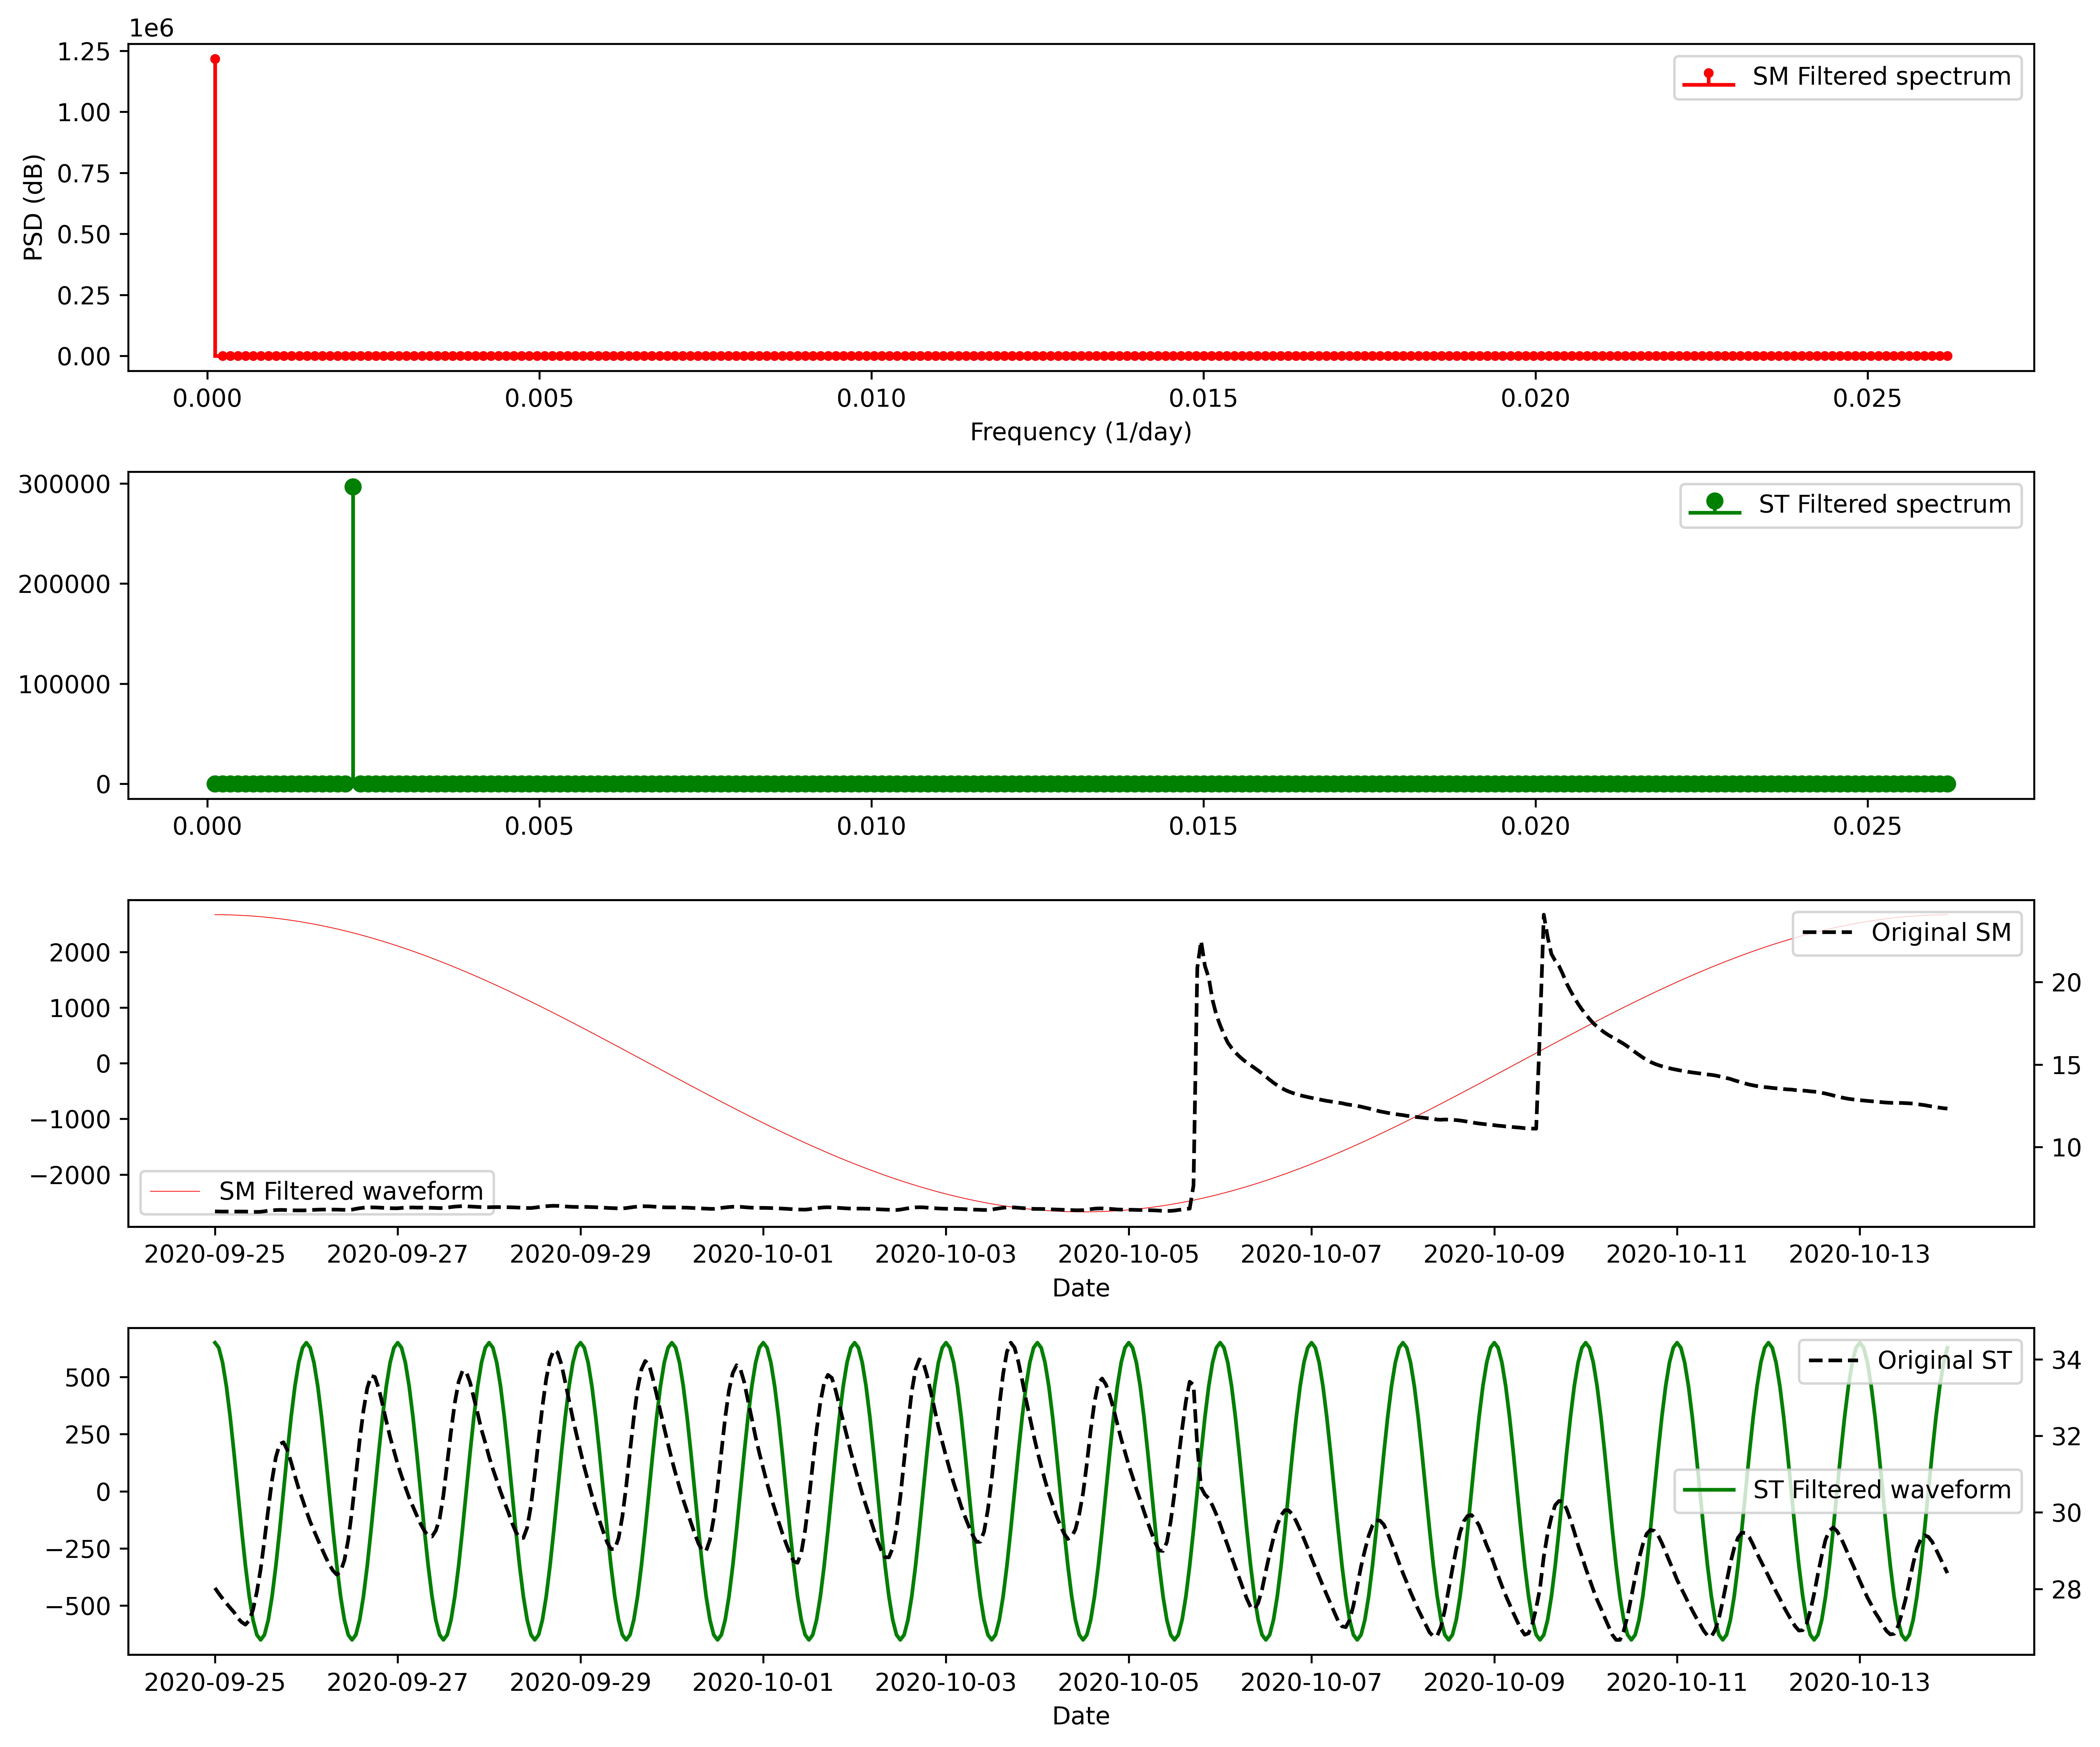

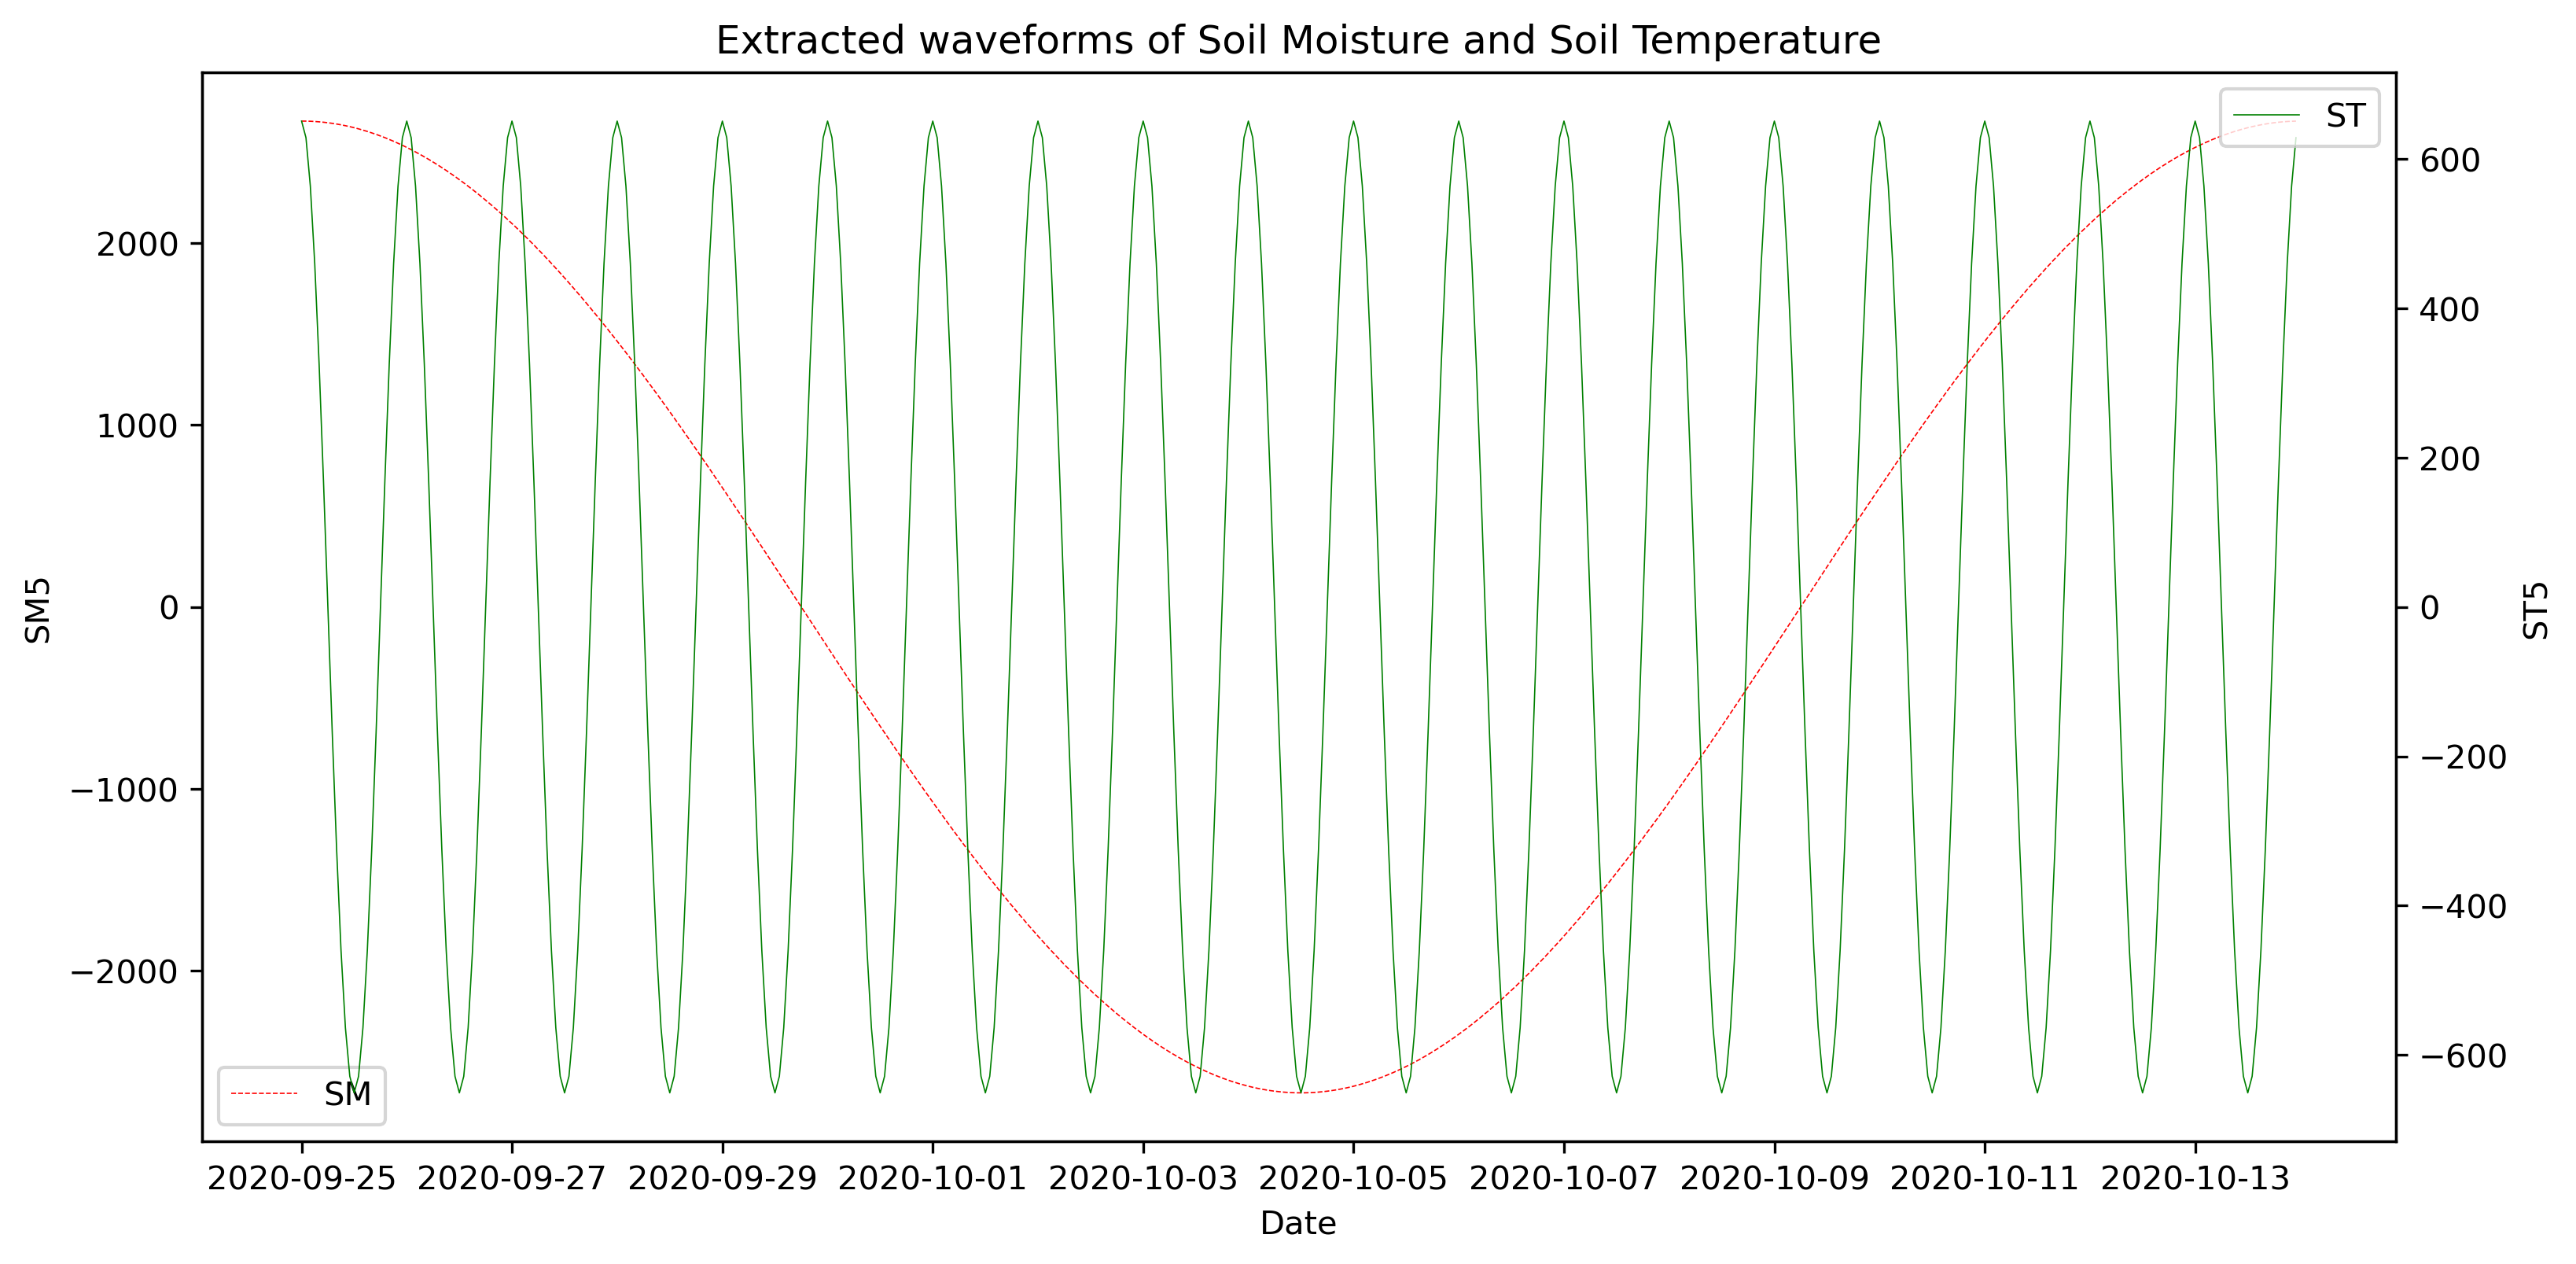

In [43]:
fig, ax1 = plt.subplots(4,1, figsize=(12, 10), dpi = 600)
bx1 = ax1[2].twinx()
bx2 = ax1[3].twinx()
ax1[0].stem(fftfreq_SM5[im], soilmoil_5[im], 'r-',markerfmt = 'r.', basefmt = 'r-', label = 'SM Filtered spectrum')
ax1[1].stem(fftfreq_temp5[it], soiltemp_5[it],  'g-', markerfmt = 'go', basefmt = 'g-', label = 'ST Filtered spectrum')
ax1[0].set_xlabel('Frequency (1/day)')
ax1[0].set_ylabel('PSD (dB)')
ax1[2].plot(date, first_waveform_SM5, 'r', lw=0.3, label = 'SM Filtered waveform')
bx1.plot(date, soilmoisture5, 'k--', label = 'Original SM')
ax1[2].set_xlabel('Date')
ax1[3].plot(date, first_waveform_ST5, 'g', label = 'ST Filtered waveform')
bx2.plot(date, soiltemp5, 'k--', label = 'Original ST')
ax1[3].set_xlabel('Date')
ax1[0].legend()
ax1[1].legend()
ax1[2].legend()
bx1.legend()
ax1[3].legend()
bx2.legend()
plt.tight_layout()
# ax1[1].plot(date, temp_waveform, 'k')


fig, ax3 = plt.subplots(figsize = (12, 6), dpi = 300)
# plt.figure(figsize = (12, 5), dpi = 500)
bx3 = ax3.twinx()
ax3.set_title('Extracted waveforms of Soil Moisture and Soil Temperature')
ax3.plot(date, first_waveform_SM5, 'r--', label = 'SM', lw = 0.4)
bx3.plot(date, first_waveform_ST5, 'g', label = 'ST', lw = 0.4)
ax3.set_xlabel('Date')
plt.xticks(rotation = 35)
ax3.set_ylabel('SM5')
bx3.set_ylabel('ST5')
# ax3.plot(date, temp_waveform, 'b', label = 'ST')
ax3.legend()
bx3.legend();

### 3. Sine and Cosine Transform after FFT